<a href="https://colab.research.google.com/github/HARSHINI20/CognoRise-Infotech/blob/main/80_cereals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
filepath = '/content/sample_data/cereal.csv'
df = pd.read_csv(filepath)
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
df[df['type'] == 'H'].head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

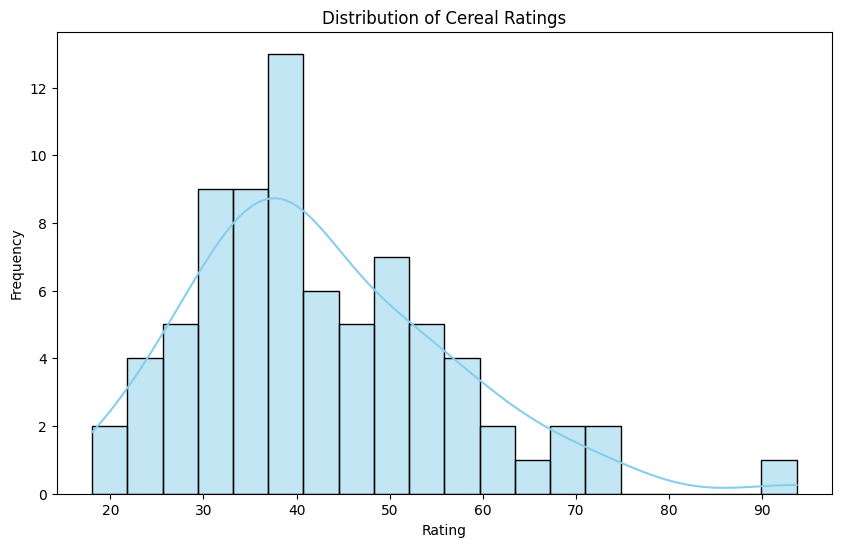

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def get_count(series, limit=None):

    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()

    x = series.index
    y = series/series.sum()*100

    return x.values,y.values

In [ ]:
def plot(x, y, x_label=None, y_label=None, title=None,figsize=(7,5), type='bar'):
    sns.set_style('darkgrid')

    fig, ax = plt.subplots(figsize=figsize)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if x_label != None:
        ax.set_xlabel(x_label)

    if y_label != None:
        ax.set_ylabel(y_label)

    if title != None:
        ax.set_title(title)

    if type == 'bar':
        sns.barplot(x=x,y=y, ax=ax)
    elif type == 'line':
        sns.lineplot(x=x,y=x, ax = ax, sort=False)

    plt.show()

In [ ]:
# manufacturer count
x,y = get_count(df['mfr'])
x,y

(array(['K', 'G', 'P', 'Q', 'R', 'N', 'A'], dtype=object),
 array([29.87012987, 28.57142857, 11.68831169, 10.38961039, 10.38961039,
         7.79220779,  1.2987013 ]))

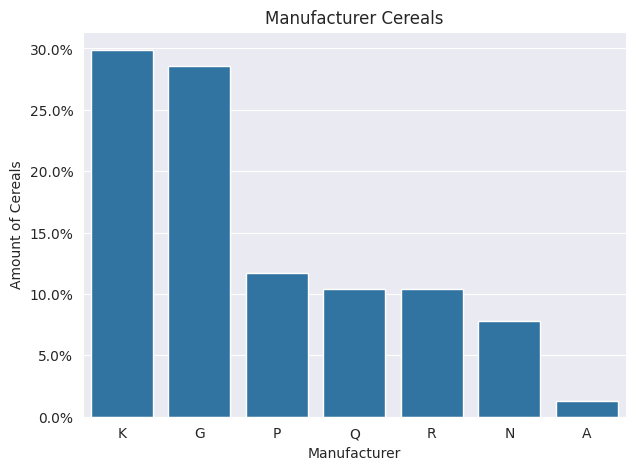

In [ ]:
plot(x=x, y=y, x_label='Manufacturer', y_label='Amount of Cereals', title='Manufacturer Cereals')

In [ ]:
nutr_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']
nutr_stats = df[nutr_cols]
nutr_stats.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000


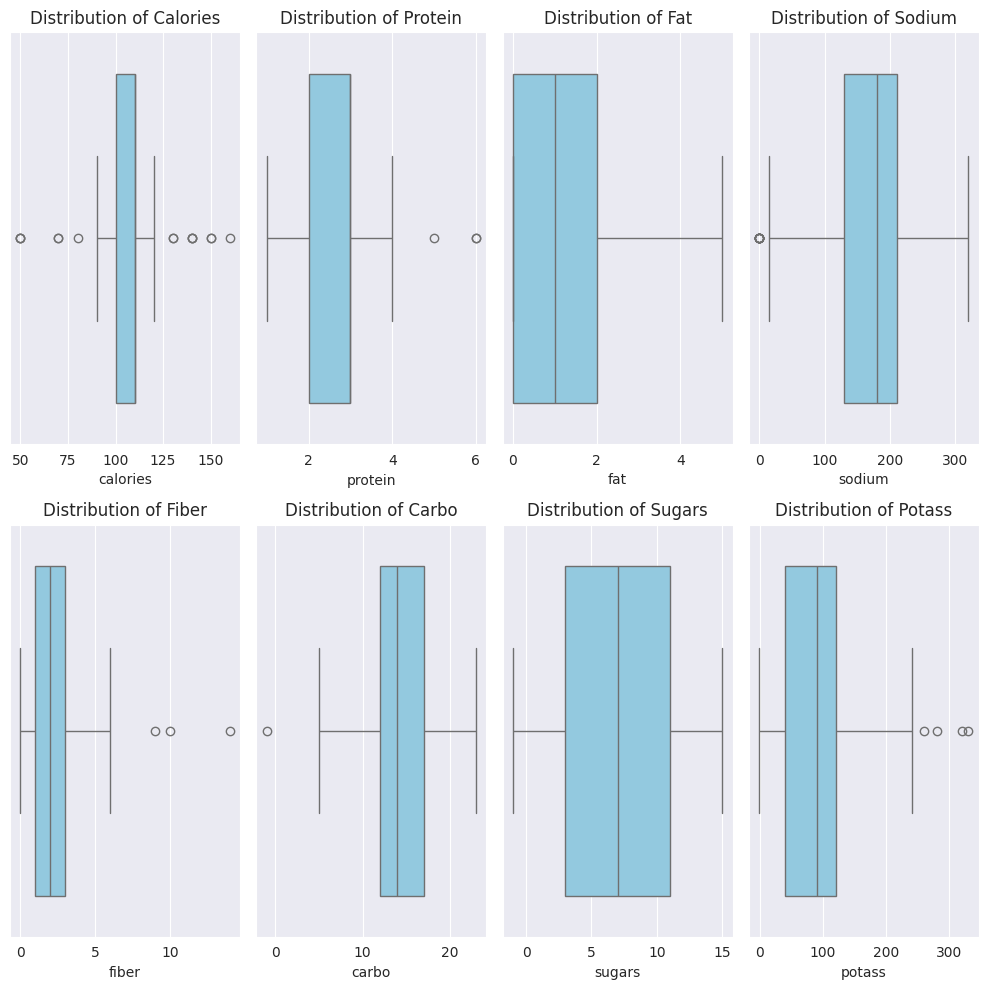

In [ ]:
plt.figure(figsize=(10,10))

for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col],color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
highest = df.loc[df[nutr_cols].idxmax()]
print("Cereals with the Highest Nutritional Content:")
print(pd.concat([highest[['name']], highest[nutr_cols]], axis=1))

# Find cereals with the lowest nutritional content
lowest = df.loc[df[nutr_cols].idxmin()]
print("\nCereals with the Lowest Nutritional Content:")
print(pd.concat([lowest[['name']], lowest[nutr_cols]], axis=1))

Cereals with the Highest Nutritional Content:
                         name  calories  protein  fat  sodium  fiber  carbo  \
46       Mueslix Crispy Blend       160        3    2     150    3.0   17.0   
11                   Cheerios       110        6    2     290    2.0   17.0   
1           100% Natural Bran       120        3    5      15    2.0    8.0   
53                 Product 19       100        3    0     320    1.0   20.0   
3   All-Bran with Extra Fiber        50        4    0     140   14.0    8.0   
61                  Rice Chex       110        1    0     240    0.0   23.0   
30               Golden Crisp       100        2    0      45    0.0   11.0   
3   All-Bran with Extra Fiber        50        4    0     140   14.0    8.0   

    sugars  potass  
46      13     160  
11       1     105  
1        8     135  
53       3      45  
3        0     330  
61       2      30  
30      15      40  
3        0     330  

Cereals with the Lowest Nutritional Content:
       

<ipython-input-31-af72fe801d50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mfr', y = col, data=df, palette='viridis')
<ipython-input-31-af72fe801d50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mfr', y = col, data=df, palette='viridis')
<ipython-input-31-af72fe801d50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mfr', y = col, data=df, palette='viridis')
<ipython-input-31-af72fe801d50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

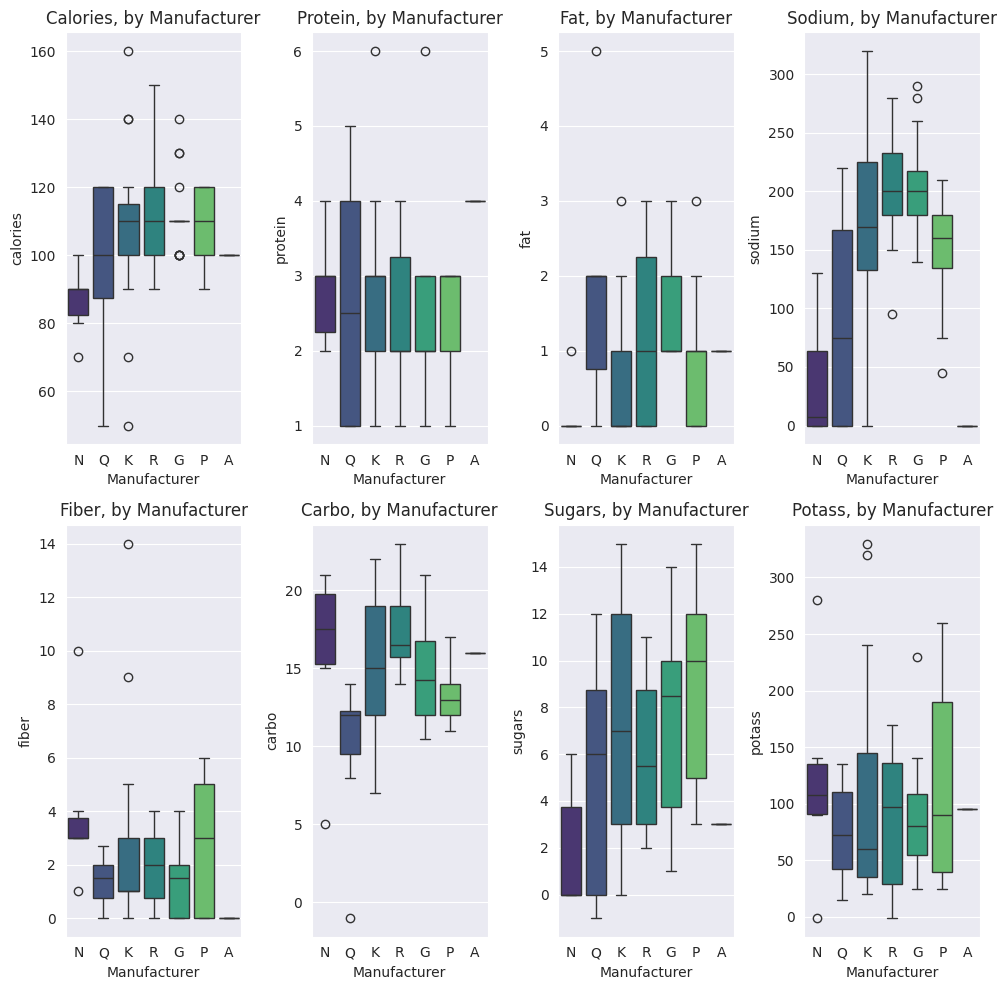

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x='mfr', y = col, data=df, palette='viridis')
    plt.title(f'{col.capitalize()}, by Manufacturer')
    plt.xlabel('Manufacturer')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
anova_res = f_oneway(*[df['rating'][df['mfr'] == mfr] for mfr in df['mfr'].unique()])
print(f"Anova Result: {anova_res}")
alpha = 0.05
if anova_res.pvalue < alpha:
    print("\nThere are significant differences in ratings between manufacturers.")
else:
    print("\nThere are no significant differences in ratings between manufacturers.")

Anova Result: F_onewayResult(statistic=6.803591271372217, pvalue=1.0324175306855554e-05)

There are significant differences in ratings between manufacturers.


In [ ]:
cold = df[df['type'] == 'C']
hot = df[df['type'] == 'H']

cold_stats = cold[nutr_cols].describe()
hot_stats = hot[nutr_cols].describe()

print("Descriptive Stats for Cold Cereals")
cold_stats

Descriptive Stats for Cold Cereals


,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.162162,2.486486,1.013514,165.067568,2.189189,14.702703,7.175676,97.216216
std,19.829428,1.062992,1.013515,80.633167,2.413862,3.889676,4.333236,71.816217
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,-1.000000
25%,100.000000,2.000000,0.000000,136.250000,1.000000,12.000000,3.000000,40.000000
50%,110.000000,2.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000
75%,110.000000,3.000000,1.750000,217.500000,3.000000,17.000000,11.000000,120.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000


In [ ]:
print("Descriptive Stats for Hot Cereals")
hot_stats

Descriptive Stats for Hot Cereals


,calories,protein,fat,sodium,fiber,carbo,sugars,potass
count,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.00000
mean,100.0,4.0,1.0,26.666667,1.233333,12.000000,0.666667,68.00000
std,0.0,1.0,1.0,46.188022,1.365040,11.532563,2.081666,60.22458
min,100.0,3.0,0.0,0.000000,0.000000,-1.000000,-1.000000,-1.00000
25%,100.0,3.5,0.5,0.000000,0.500000,7.500000,-0.500000,47.00000
50%,100.0,4.0,1.0,0.000000,1.000000,16.000000,0.000000,95.00000
75%,100.0,4.5,1.5,40.000000,1.850000,18.500000,1.500000,102.50000
max,100.0,5.0,2.0,80.000000,2.700000,21.000000,3.000000,110.00000


<ipython-input-30-1cefefc17673>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= df, palette='pastel')
<ipython-input-30-1cefefc17673>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= df, palette='pastel')
<ipython-input-30-1cefefc17673>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data= df, palette='pastel')
<ipython-input-30-1cefefc17673>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

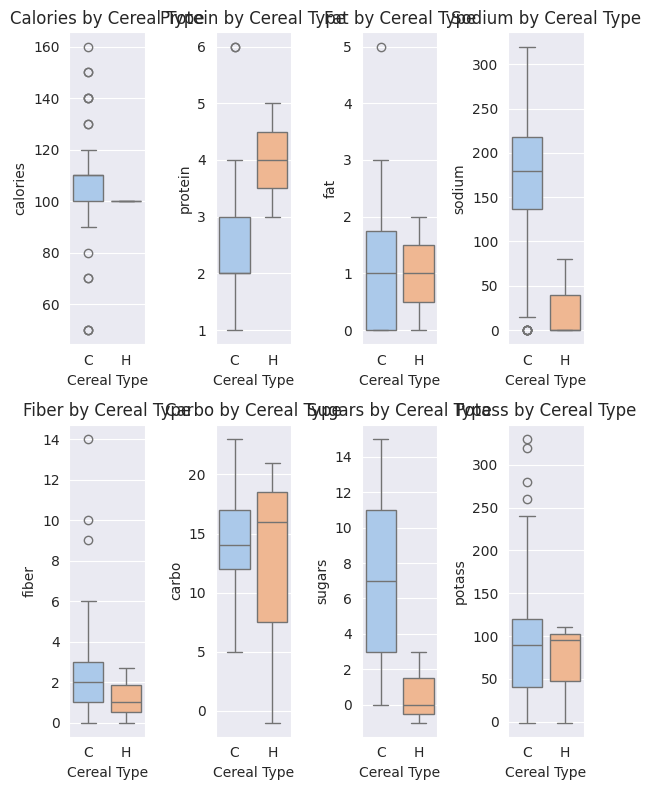

In [ ]:
plt.figure(figsize=(6,8))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='type', y=col, data= df, palette='pastel')
    plt.title(f'{col.capitalize()} by Cereal Type')
    plt.xlabel('Cereal Type')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
correlation_coef, p_value = pearsonr(df['shelf'], df['rating'])

print(f"Pearson Correlation Coefficient: {correlation_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.03
P-value: 0.8281


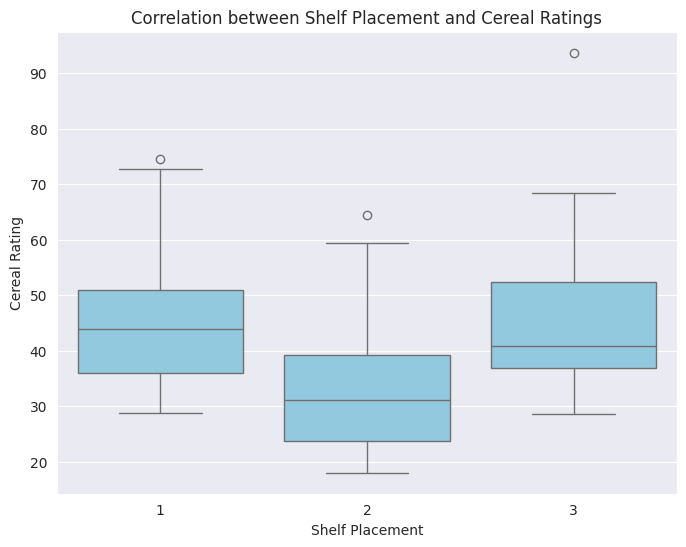

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='shelf', y='rating', data=df, color='skyblue')
plt.title("Correlation between Shelf Placement and Cereal Ratings")
plt.xlabel('Shelf Placement')
plt.ylabel('Cereal Rating')
plt.show()

<ipython-input-49-534525857b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=df, palette='viridis')
<ipython-input-49-534525857b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=df, palette='viridis')
<ipython-input-49-534525857b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shelf',y=col, data=df, palette='viridis')
<ipython-input-49-534525857b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

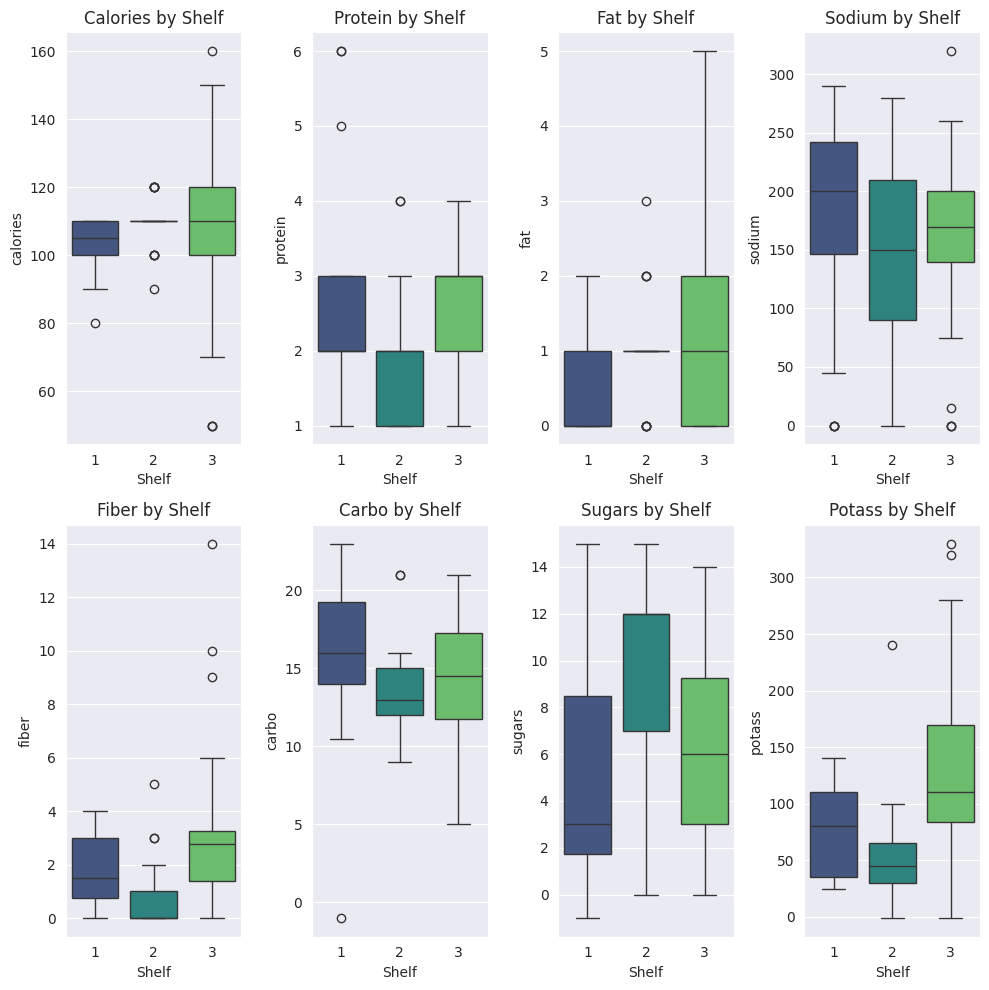

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2,4,i)
    sns.boxplot(x='shelf',y=col, data=df, palette='viridis')
    plt.title(f'{col.capitalize()} by Shelf')
    plt.xlabel('Shelf')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
corr_coeff, p_value = pearsonr(df['weight'], df['rating'])
print(f"Pearson Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.30
P-value: 0.0085


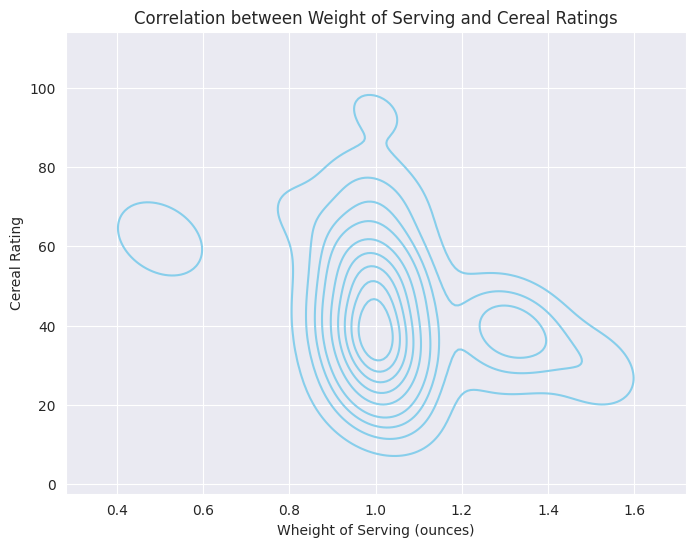

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='weight', y='rating', data=df, color='skyblue')
plt.title('Correlation between Weight of Serving and Cereal Ratings')
plt.xlabel('Wheight of Serving (ounces)')
plt.ylabel('Cereal Rating')
plt.show()

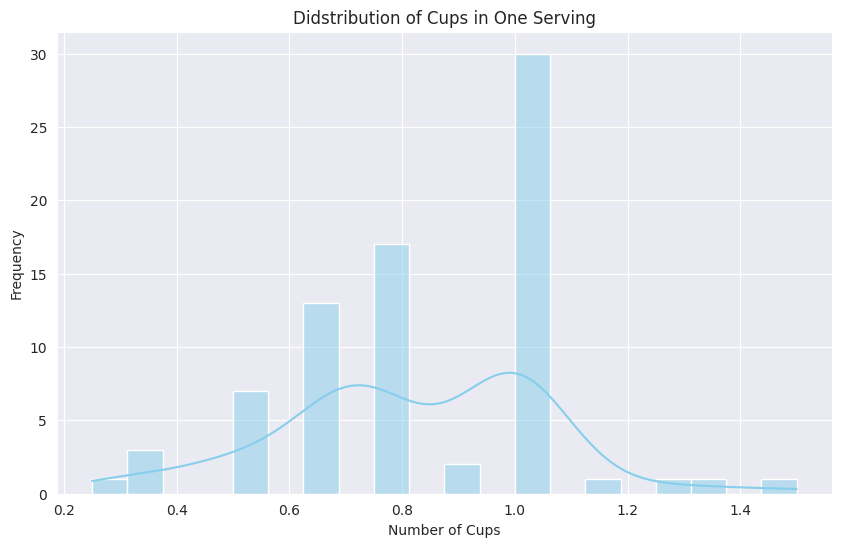

In [ ]:
cups_stats = df['cups'].describe()

plt.figure(figsize=(10,6))
sns.histplot(df['cups'], bins=20, kde=True, color = 'skyblue')
plt.title('Didstribution of Cups in One Serving')
plt.xlabel('Number of Cups')
plt.ylabel('Frequency')
plt.show()


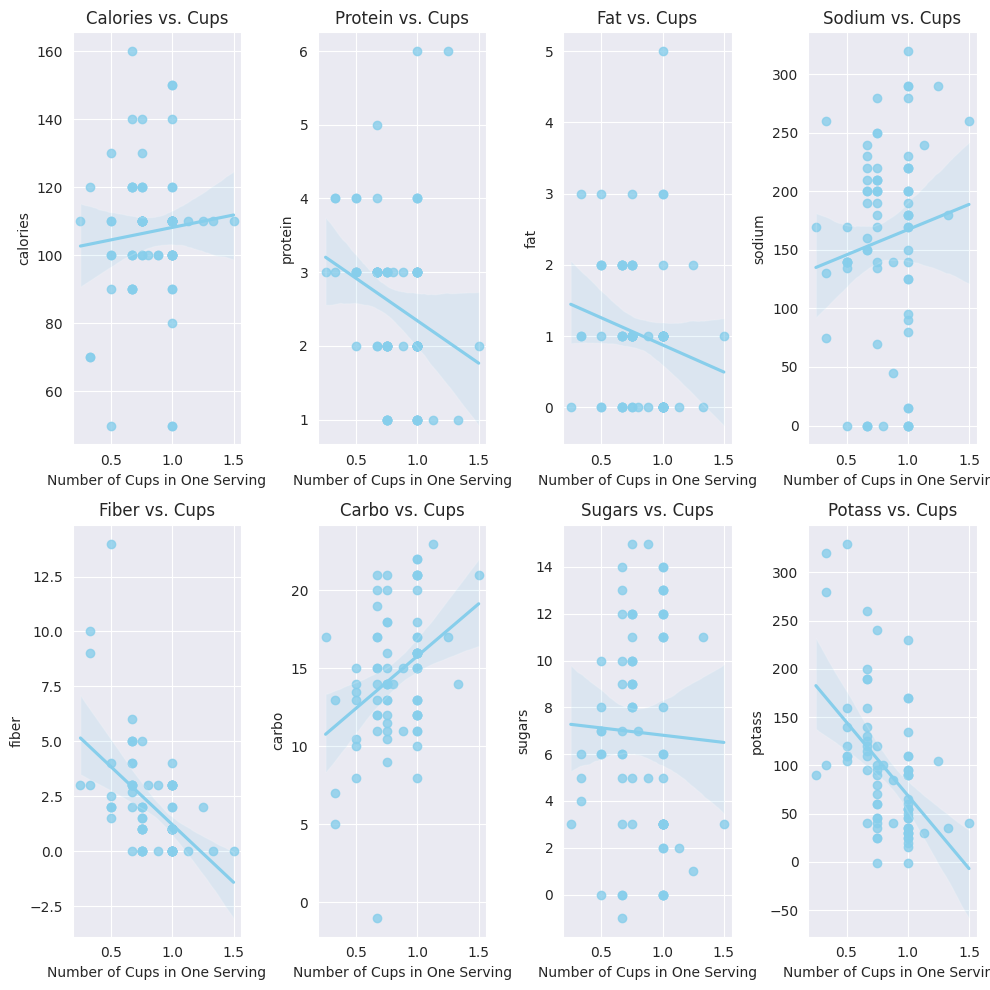

In [ ]:
plt.figure(figsize=(10,10))

for i, col in enumerate(nutr_cols, 1):
    plt.subplot(2,4,i)
    sns.regplot(x='cups', y=col, data=df, color='skyblue')
    plt.title(f'{col.capitalize()} vs. Cups')
    plt.xlabel('Number of Cups in One Serving')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

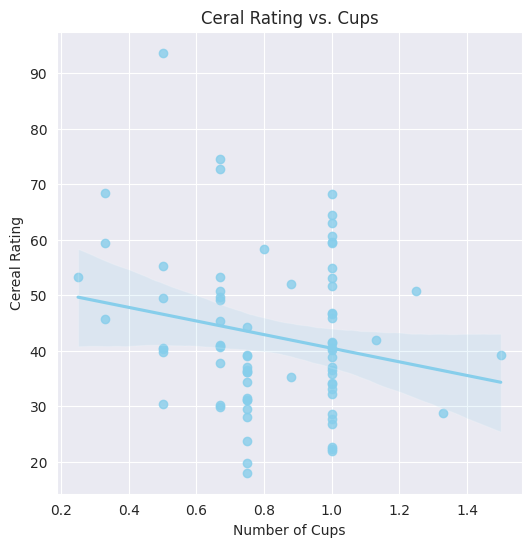

In [ ]:
plt.figure(figsize=(6, 6))
sns.regplot(x='cups', y='rating', data=df, color='skyblue')
plt.title('Ceral Rating vs. Cups')
plt.xlabel('Number of Cups')
plt.ylabel('Cereal Rating')
plt.show()

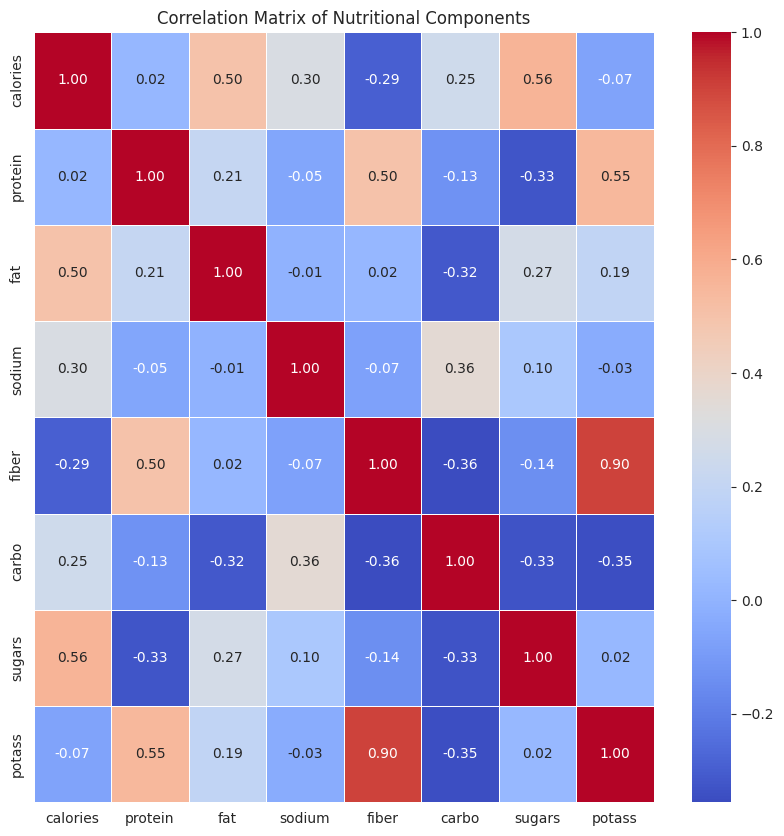

In [ ]:
corr_matrix = df[nutr_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

<ipython-input-45-4ea004390ae4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vitamins', y='rating', data=vit_rating, palette='pastel')


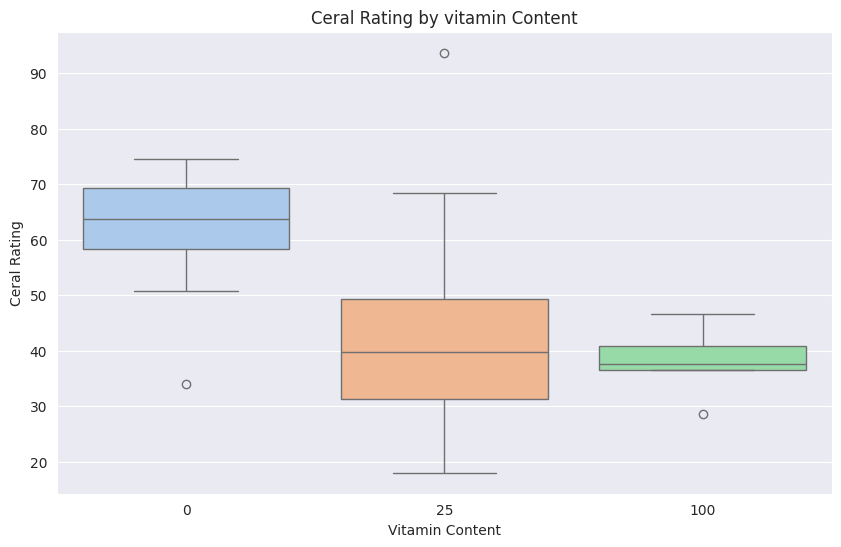

In [ ]:
vit_rating = df[['vitamins'] + ['rating']]
plt.figure(figsize=(10,6))
sns.boxplot(x='vitamins', y='rating', data=vit_rating, palette='pastel')
plt.title('Ceral Rating by vitamin Content')
plt.xlabel('Vitamin Content')
plt.ylabel('Ceral Rating')
plt.show()


Text(0, 0.5, 'Cereal Rating')

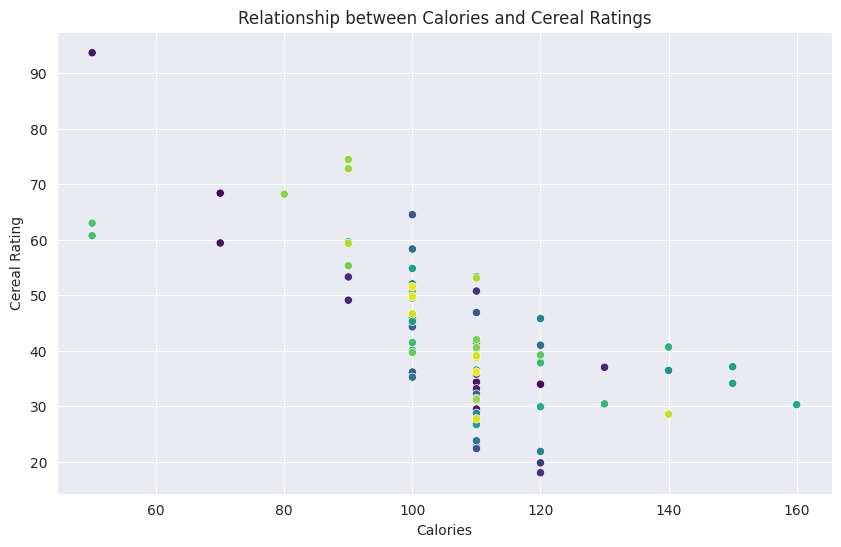

In [ ]:
nutritional_component = 'calories'


plt.figure(figsize=(10, 6))
sns.scatterplot(x=nutritional_component, y='rating', data=df, hue='name', palette='viridis', legend=False)
plt.title(f'Relationship between {nutritional_component.capitalize()} and Cereal Ratings')
plt.xlabel(f'{nutritional_component.capitalize()}')
plt.ylabel('Cereal Rating')

In [ ]:
X = df[nutr_cols]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9101291857071516


In [ ]:
new_data = pd.DataFrame({
    'calories': [110, 90, 120],
    'protein': [2, 3, 4],
    'fat': [1, 0, 2],
    'sodium': [200, 180, 220],
    'fiber': [5, 3, 6],
    'carbo': [20, 15, 25],
    'sugars': [7, 5, 8],
    'potass': [320, 250, 380]
})

new_predictions = model.predict(new_data)


predicted_ratings_df = pd.DataFrame({'Predicted Rating': new_predictions})
result_df = pd.concat([new_data, predicted_ratings_df], axis=1)
print("Test Data with Predicted Ratings:")
result_df

Test Data with Predicted Ratings:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,Predicted Rating
0,110,2,1,200,5,20,7,320,44.860066
1,90,3,0,180,3,15,5,250,47.546260
2,120,4,2,220,6,25,8,380,52.037521
